<h2 align="center">📌 Gaussian Mixture Model (GMM) using the EM Algorithm</h2>

<hr>

<h3>🔹 Introduction</h3>

<p>Gaussian Mixture Models (GMMs) are a probabilistic approach to clustering that assumes data points are generated from a mixture of multiple Gaussian distributions with unknown parameters. The Expectation-Maximization (EM) algorithm is used to iteratively estimate these parameters.</p>

<hr>

<h3>🔹 Mathematical Formulation</h3>

<h4>1️⃣ Probability Density Function of a Gaussian Distribution</h4>
<p>The probability density function (PDF) of a multivariate Gaussian distribution is given by:</p>

$$
p(\mathbf{x} | \mu, \Sigma) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x} - \mu)^T \Sigma^{-1} (\mathbf{x} - \mu) \right)
$$

<p>where:</p>
<ul>
  <li>\(\mathbf{x} \in \mathbb{R}^d\) is the data point</li>
  <li>\(\mu \in \mathbb{R}^d\) is the mean vector</li>
  <li>\(\Sigma \in \mathbb{R}^{d \times d}\) is the covariance matrix</li>
</ul>

<hr>

<h4>2️⃣ Mixture Model Representation</h4>
<p>A GMM assumes that the data is generated from \(K\) Gaussian components, each with its own mean and covariance:</p>

$$
p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \, p(\mathbf{x} | \mu_k, \Sigma_k)
$$

<p>where:</p>
<ul>
  <li>\(\pi_k\) are the mixture weights (priors), ensuring \(\sum_{k=1}^{K} \pi_k = 1\)</li>
  <li>\(p(\mathbf{x} | \mu_k, \Sigma_k)\) is the Gaussian probability for component \(k\)</li>
</ul>

<hr>

<h3>🔹 Expectation-Maximization (EM) Algorithm</h3>

<h4>1️⃣ E-Step: Compute Responsibilities</h4>
<p>We compute the probability that each data point belongs to each cluster:</p>

$$
\gamma_{nk} = \frac{\pi_k p(\mathbf{x_n} | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j p(\mathbf{x_n} | \mu_j, \Sigma_j)}
$$

<h4>2️⃣ M-Step: Update Parameters</h4>
<p>Using the computed responsibilities, we update the model parameters:</p>

<ul>
  <li><b>New means:</b> \( \mu_k = \frac{\sum_{n=1}^{N} \gamma_{nk} \mathbf{x_n}}{\sum_{n=1}^{N} \gamma_{nk}} \)</li>
  <li><b>New covariance matrices:</b>  
    $$ \Sigma_k = \frac{\sum_{n=1}^{N} \gamma_{nk} (\mathbf{x_n} - \mu_k)(\mathbf{x_n} - \mu_k)^T}{\sum_{n=1}^{N} \gamma_{nk}} $$  
  </li>
  <li><b>New priors:</b> \( \pi_k = \frac{1}{N} \sum_{n=1}^{N} \gamma_{nk} \)</li>
</ul>

<hr>

<h3>🔹 Log-Likelihood & Convergence</h3>
<p>The log-likelihood is used to measure how well the model fits the data:</p>

$$
\mathcal{L} = \sum_{n=1}^{N} \log \left( \sum_{k=1}^{K} \pi_k p(\mathbf{x_n} | \mu_k, \Sigma_k) \right)
$$

<p>We iterate until convergence, stopping when the log-likelihood change is below a threshold.</p>

<hr>

<h3>📝 Activity Questions</h3>

<p>Now that you have implemented GMM with the EM algorithm, answer the following questions:</p>

<ol>
  <li><b>How do the priors (\(\pi_k\)) and covariances (\(\Sigma_k\)) evolve as the algorithm iterates?</b></li>
  <li><b>What are the advantages of using GMM over K-Means for clustering?</b></li>
  <li><b>How would you modify the implementation to handle high-dimensional data efficiently?</b></li>
</ol>

<p>💡 Discuss your answers in a Markdown cell and support them with visualizations or theoretical arguments.</p>

<hr>
<h3 align="center">🚀 Happy Coding!</h3>


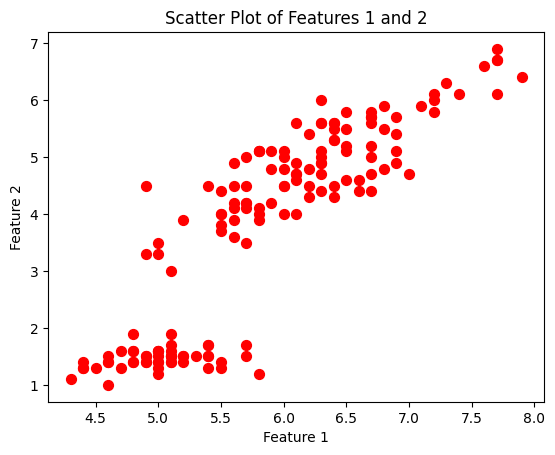

Iteration 1, Log-Likelihood: -2612.3355
Iteration 2, Log-Likelihood: -2812.5021
Iteration 3, Log-Likelihood: -3377.6944
Iteration 4, Log-Likelihood: -3499.8164
Iteration 5, Log-Likelihood: -3535.9474
Iteration 6, Log-Likelihood: -3587.7061
Iteration 7, Log-Likelihood: -3678.9304
Iteration 8, Log-Likelihood: -3771.1153
Iteration 9, Log-Likelihood: -3799.8279
Iteration 10, Log-Likelihood: -3805.6729
Iteration 11, Log-Likelihood: -3808.3384
Iteration 12, Log-Likelihood: -3812.2755
Iteration 13, Log-Likelihood: -3819.5702
Iteration 14, Log-Likelihood: -3830.8969
Iteration 15, Log-Likelihood: -3845.6473
Iteration 16, Log-Likelihood: -3861.4742
Iteration 17, Log-Likelihood: -3876.0809
Iteration 18, Log-Likelihood: -3887.6742
Iteration 19, Log-Likelihood: -3895.9224
Iteration 20, Log-Likelihood: -3901.5530
Iteration 21, Log-Likelihood: -3906.5189
Iteration 22, Log-Likelihood: -3910.4832
Iteration 23, Log-Likelihood: -3911.6597
Iteration 24, Log-Likelihood: -3911.3710
Iteration 25, Log-Likelih

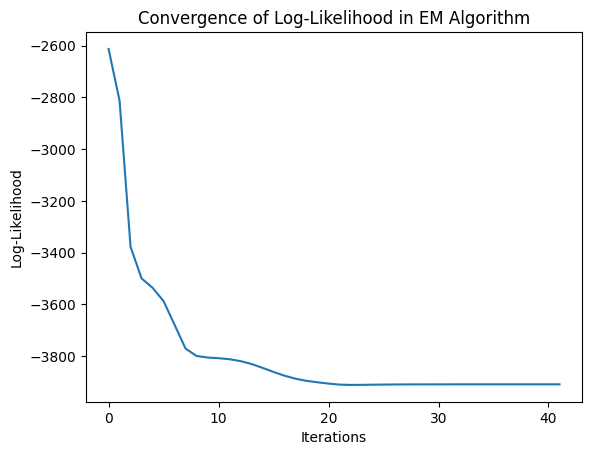

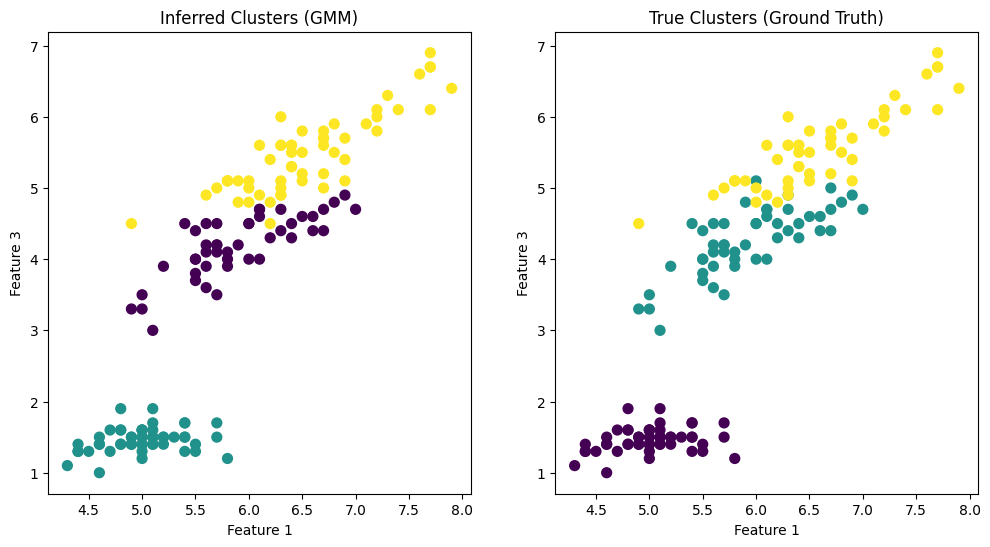

Rand Score (Clustering Accuracy): 0.9575


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.datasets import load_iris
from sklearn.metrics import rand_score

# Set random seed for reproducibility
np.random.seed(42)

# Load the IRIS dataset
X, y = load_iris(return_X_y=True)
X_2d = X[:, [0, 2, 1, 3]]  # Select relevant features

# Scatter plot of first two features
plt.scatter(X_2d[:, 0], X_2d[:, 1], marker='o', color='r', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Features 1 and 2')
plt.show()

# Initialize parameters
K = 3  # Number of clusters
n, d = X_2d.shape
epsilon = 1e-6  # Small value to prevent log(0)

# Mixing coefficients (initial uniform distribution)
pi = np.ones(K) / K

# Initialize means using random samples from data
random_indices = np.random.choice(n, K, replace=False)
mu = X_2d[random_indices, :]

# Function to generate a positive definite covariance matrix
def generate_positive_definite_matrix(d):
    A = np.random.randn(d, d)
    return np.dot(A, A.T) + np.eye(d) * epsilon  # Add identity for stability

# Initialize covariance matrices
Sigma = np.array([generate_positive_definite_matrix(d) for _ in range(K)])

# Ensure covariance matrix is positive definite
def ensure_positive_definite(Sigma):
    return Sigma + np.eye(Sigma.shape[0]) * epsilon

# Expectation Step (E-step)
def expectation_step(X, mu, Sigma, pi):
    """ Compute responsibilities (γ) given current parameters. """
    gamma = np.zeros((n, K))
    for k in range(K):
        try:
            gamma[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=ensure_positive_definite(Sigma[k]))
        except np.linalg.LinAlgError:
            print(f"Warning: Fixing singular covariance matrix for cluster {k}")
            Sigma[k] = ensure_positive_definite(Sigma[k])
            gamma[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=Sigma[k])

    gamma += epsilon  # Prevents division by zero
    gamma /= gamma.sum(axis=1, keepdims=True)  # Normalize
    return gamma

# Maximization Step (M-step)
def maximization_step(X, gamma):
    """ Update parameters based on responsibilities. """
    Nk = gamma.sum(axis=0)  # Effective cluster size
    pi_new = Nk / n  # Update mixing coefficients
    mu_new = np.dot(gamma.T, X) / Nk[:, np.newaxis]  # Update means

    Sigma_new = np.zeros((K, d, d))
    for k in range(K):
        X_centered = X - mu_new[k]
        Sigma_new[k] = np.dot(gamma[:, k] * X_centered.T, X_centered) / Nk[k]
        Sigma_new[k] = ensure_positive_definite(Sigma_new[k])  # Ensure positive definiteness

    return pi_new, mu_new, Sigma_new

# Compute Log-Likelihood
def compute_log_likelihood(X, pi, mu, Sigma):
    """ Compute the Log-Likelihood to monitor convergence. """
    log_likelihood = 0
    for k in range(K):
        try:
            prob = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=ensure_positive_definite(Sigma[k]))
            prob += epsilon  # Prevents log(0)
            log_likelihood += np.sum(np.log(prob))
        except np.linalg.LinAlgError:
            print(f"Warning: Fixing covariance matrix for cluster {k}")
            Sigma[k] = ensure_positive_definite(Sigma[k])
            prob = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=Sigma[k]) + epsilon
            log_likelihood += np.sum(np.log(prob))

    return log_likelihood

# EM Algorithm for GMM
max_iters = 100  # Maximum iterations
tol = 1e-4  # Convergence threshold
log_likelihoods = []
prev_log_likelihood = -np.inf  # Initialize with a very low value

for i in range(max_iters):
    gamma = expectation_step(X_2d, mu, Sigma, pi)
    pi, mu, Sigma = maximization_step(X_2d, gamma)

    # Compute log-likelihood
    log_likelihood = compute_log_likelihood(X_2d, pi, mu, Sigma)
    log_likelihoods.append(log_likelihood)

    print(f"Iteration {i+1}, Log-Likelihood: {log_likelihood:.4f}")

    # Check for convergence
    if np.abs(log_likelihood - prev_log_likelihood) < tol:
        print(f"Converged at iteration {i+1}.")
        break
    prev_log_likelihood = log_likelihood

# Plot log-likelihood evolution
plt.plot(log_likelihoods)
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Convergence of Log-Likelihood in EM Algorithm')
plt.show()

# Assign cluster labels based on maximum responsibility
Z = np.argmax(gamma, axis=1)

# Visualization: True vs Predicted Clusters
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

# Plot predicted clusters
ax[0].scatter(X_2d[:, 0], X_2d[:, 1], marker='o', c=Z, s=50, cmap='viridis')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 3')
ax[0].set_title('Inferred Clusters (GMM)')

# Plot ground truth clusters
ax[1].scatter(X_2d[:, 0], X_2d[:, 1], marker='o', c=y, s=50, cmap='viridis')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 3')
ax[1].set_title('True Clusters (Ground Truth)')

plt.show()

# Compute Rand Index for clustering performance evaluation
score = rand_score(y, Z)
print(f"Rand Score (Clustering Accuracy): {score:.4f}")
